# CIFAR10 using MLP and CNN

Trying MLP and CNN using the CIFAR10 dataset

### Import dependencies

In [83]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


### Import CIFAR10 Dataset

In [0]:
cifar10_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10_dataset.load_data()

### Normalize Data

In [85]:
train_images = train_images / 255
test_images = test_images / 255

train_images.shape

(50000, 32, 32, 3)

In [0]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### For visual purpose (preview dataset)

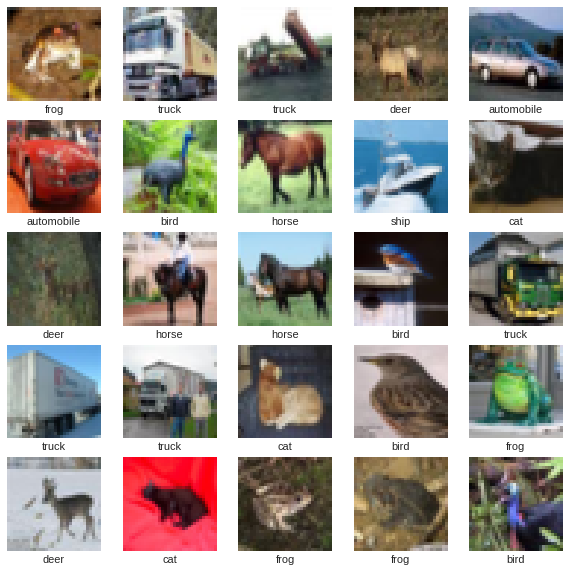

In [87]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(cifar10_labels[int(train_labels[i])])
plt.show()

### Initialize MLP Model

In [88]:
model_mlp = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_mlp.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


### Train MLP Model

In [89]:
model_mlp.fit(train_images, train_labels, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 23s 452us/sample - loss: 2.1146 - acc: 0.3254
Epoch 2/10
50000/50000 [==============================] - 22s 438us/sample - loss: 1.7673 - acc: 0.3928
Epoch 3/10
50000/50000 [==============================] - 18s 366us/sample - loss: 1.7134 - acc: 0.4117
Epoch 4/10
50000/50000 [==============================] - 22s 430us/sample - loss: 1.6910 - acc: 0.4203
Epoch 5/10
50000/50000 [==============================] - 18s 363us/sample - loss: 1.6779 - acc: 0.4274
Epoch 6/10
50000/50000 [==============================] - 22s 432us/sample - loss: 1.6584 - acc: 0.4385
Epoch 7/10
50000/50000 [==============================] - 18s 359us/sample - loss: 1.6448 - acc: 0.4384
Epoch 8/10
50000/50000 [==============================] - 21s 425us/sample - loss: 1.6434 - acc: 0.4403
Epoch 9/10
50000/50000 [==============================] - 18s 366us/sample - loss: 1.6373 - acc: 0.4440
Epoch 10/10
50000/50000 [==============================] - 21s 4

### Test MLP Model

In [90]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_mlp)

10000/10000 [==============================] - 2s 152us/sample - loss: 1.6227 - acc: 0.4547
Test accuracy: 0.4547


### Initialize CNN Model

In [91]:
model_cnn = Sequential()
model_cnn.add(Conv2D(filters=64, 
                kernel_size=(6, 6),
                activation='relu',
                kernel_regularizer=keras.regularizers.l2(0.001),
                input_shape=(32, 32, 3)))
model_cnn.add(MaxPool2D())

model_cnn.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu',
                kernel_regularizer=keras.regularizers.l2(0.001)))
model_cnn.add(MaxPool2D())


model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 27, 27, 64)        6976      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                16010     
Total params: 59,914
Trainable params: 59,914
Non-trainable params: 0
_________________________________________________________________


### Train CNN Model

In [92]:
model_cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 25s 496us/step - loss: 1.6253 - acc: 0.4266
Epoch 2/10
50000/50000 [==============================] - 20s 402us/step - loss: 1.3550 - acc: 0.5356
Epoch 3/10
50000/50000 [==============================] - 20s 393us/step - loss: 1.2489 - acc: 0.5815
Epoch 4/10
50000/50000 [==============================] - 19s 389us/step - loss: 1.1736 - acc: 0.6105
Epoch 5/10
50000/50000 [==============================] - 20s 404us/step - loss: 1.1220 - acc: 0.6332
Epoch 6/10
50000/50000 [==============================] - 20s 402us/step - loss: 1.0816 - acc: 0.6481
Epoch 7/10
50000/50000 [==============================] - 20s 407us/step - loss: 1.0465 - acc: 0.6627
Epoch 8/10
50000/50000 [==============================] - 20s 406us/step - loss: 1.0244 - acc: 0.6743
Epoch 9/10
50000/50000 [==============================] - 20s 404us/step - loss: 1.0016 - acc: 0.6805
Epoch 10/10
50000/50000 [==============================] - 20s 402us/step - loss: 

### Test CNN Model

In [93]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_cnn)

10000/10000 [==============================] - 3s 329us/step
Test accuracy: 0.6515


## Comparision


In [94]:
import pandas as pd
result = [[test_acc_mlp*100, test_acc_cnn*100], [int(model_mlp.count_params()), int(model_cnn.count_params())]]
pd.DataFrame(result, columns=["MLP", "CNN"], index=["Accuracy", "Parameters"])

,MLP,CNN
Accuracy,4.547000e+01,65.15
Parameters,1.841162e+06,59914.00


## Conclusion

Based on the test above the CNN model was more accurate than the MLP model with less number of parameters.